                                        Developing Prediction Model of Loan Risks in Banks

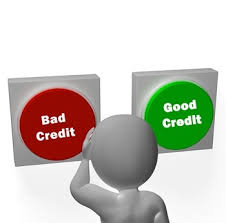

In [123]:
from IPython.display import Image
Image(filename='credit.jpg')

In [3]:
# Connect to the working directory
import os
os.getcwd()
os.chdir('C:/Users/Abin/Desktop/Imarticus Project')
# import the required package and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

                                                        Data Sourcing

In [4]:
# Import the fulldata
fulldata=pd.read_csv('fulldata.csv')
fulldata.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
fulldata.shape

(855969, 73)

In [6]:
# Remove the column which has more than 30% of NA values
NA_columns=fulldata.isnull().sum()
NA_col_3P=NA_columns[NA_columns.values> 0.3*len(fulldata)]
NA_col_3P

desc                           734157
mths_since_last_delinq         439812
mths_since_last_record         724785
mths_since_last_major_derog    642830
annual_inc_joint               855527
dti_joint                      855529
verification_status_joint      855527
open_acc_6m                    842681
open_il_6m                     842681
open_il_12m                    842681
open_il_24m                    842681
mths_since_rcnt_il             843035
total_bal_il                   842681
il_util                        844360
open_rv_12m                    842681
open_rv_24m                    842681
max_bal_bc                     842681
all_util                       842681
inq_fi                         842681
total_cu_tl                    842681
inq_last_12m                   842681
dtype: int64

                              Plot the column name against NA values

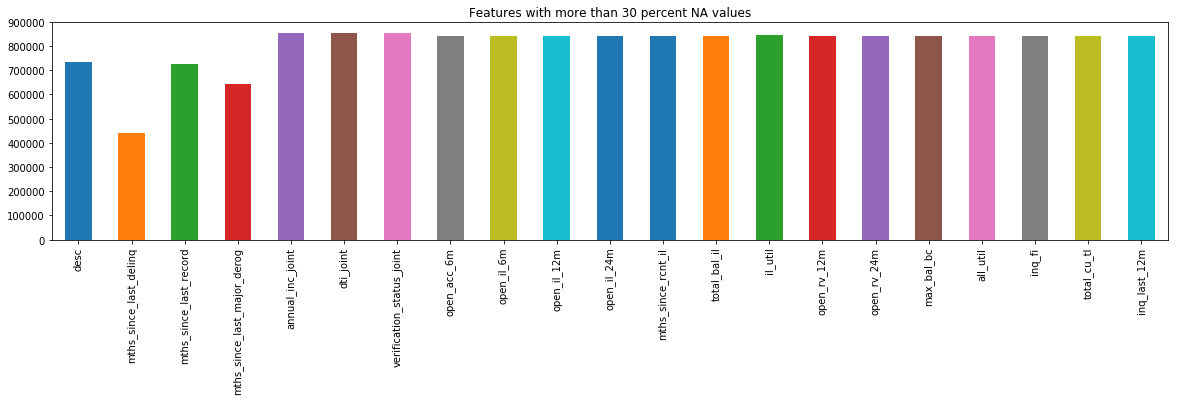

In [7]:
%matplotlib inline
plt.figure(figsize=(20,4))
NA_col_3P.plot(kind='bar')
plt.title('Features with more than 30 percent NA values')
plt.show()

                                           Data Cleaning

In [8]:
# Remove the column with 30% of missing values
to_drop_3P=NA_col_3P.index
fulldata=fulldata.drop(to_drop_3P,axis=1)
# Now dataset contains 855968 rows and 52 columns

In [11]:
fulldata.nunique()

id                            855969
member_id                     855969
loan_amnt                       1368
funded_amnt                     1368
funded_amnt_inv                 8818
term                               2
int_rate                         520
installment                    67349
grade                              7
sub_grade                         35
emp_title                     290909
emp_length                        11
home_ownership                     6
annual_inc                     48163
verification_status                3
issue_d                          103
pymnt_plan                         2
purpose                           14
title                          60946
zip_code                         931
addr_state                        51
dti                             4074
delinq_2yrs                       29
earliest_cr_line                 697
inq_last_6mths                     9
open_acc                          77
pub_rec                           31
r

In [12]:
fulldata['collections_12_mths_ex_med'].value_counts()# Most of the value are 0


0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [13]:
fulldata['emp_title'].value_counts()

Teacher                                 12965
Manager                                 10821
Registered Nurse                         5341
RN                                       5182
Owner                                    5157
Supervisor                               4792
Sales                                    4051
Project Manager                          3856
Driver                                   3417
Office Manager                           3404
Director                                 3067
General Manager                          3060
manager                                  2994
teacher                                  2820
owner                                    2727
Engineer                                 2574
President                                2478
driver                                   2319
Vice President                           2283
Attorney                                 2074
Operations Manager                       1995
Accountant                        

In [14]:
fulldata['title'].value_counts()

Debt consolidation                                         398089
Credit card refinancing                                    159228
Home improvement                                            38633
Other                                                       30522
Debt Consolidation                                          15469
Major purchase                                              11519
Medical expenses                                             6408
Business                                                     6325
Car financing                                                5372
Consolidation                                                5266
debt consolidation                                           4718
Debt Consolidation Loan                                      3744
Moving and relocation                                        3724
Vacation                                                     3640
Credit Card Consolidation                                    2326
Home buyin

In [15]:
fulldata['sub_grade'].value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

In [16]:
fulldata['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [17]:
fulldata['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

                                                    Unique Features

We can remove emp_title as well because it has more than 280000 unique emp_title and around 6% NA values and imputing them or deleting rows from relevant data will lead to loss of data, hence, we will take out that column itself.

title column can be removed because it is redundant with purpose column which has fewer categories.

 Sub-grade is redundant with grade, so we can remove it better
 
pymnt_plan has 855964 no, application_type has 855527 individual level, So it won't explain anything

most of the collections_12_mths_ex_med values are zero

In [18]:
not_required_columns=['id','member_id','zip_code','collections_12_mths_ex_med','emp_title','title','policy_code','application_type','sub_grade','pymnt_plan']

In [19]:
fulldata=fulldata.drop(not_required_columns,axis=1)
fulldata.shape

(855969, 42)

                                    Variables which would not be present when we make decision

Variables such as funded_amnt, funded_amnt_inv,out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_int, total_rec_late_fee, total_rec_prncp etc. are basically customer payment behaiviour parameters which will not be available during decision making.

In [20]:
not_present_decision=['last_pymnt_d','last_credit_pull_d','funded_amnt','funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','next_pymnt_d']
fulldata=fulldata.drop(not_present_decision,axis=1)
fulldata.shape

(855969, 27)

In [21]:
# Read the saved csv file with 26 variables
df=pd.read_csv('fullset.csv')

In [22]:
df.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
purpose                 object
addr_state              object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util             float64
total_acc                int64
initial_list_status     object
tot_coll_amt           float64
tot_cur_bal            float64
total_rev_hi_lim       float64
default_ind              int64
dtype: object

In [23]:
# change the data types for few variables
df['default_ind']=df['default_ind'].astype(object)
df['delinq_2yrs']=df['delinq_2yrs'].astype(object)
df['inq_last_6mths']=df['inq_last_6mths'].astype(object)
df['pub_rec']=df['pub_rec'].astype(object)

                                               Exploratory Data Analysis

In [119]:
correlation=df.corr()
correlation

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_year_duration
loan_amnt,1.000000,0.142901,0.944871,0.105411,0.335214,0.020170,0.198904,0.337494,0.119618,0.222077,-0.004272,0.329152,0.312082,0.169843
int_rate,0.142901,1.000000,0.130391,0.010706,-0.073841,0.078439,-0.011122,-0.035364,0.271643,-0.039508,0.001130,-0.091416,-0.165529,-0.103962
installment,0.944871,0.130391,1.000000,0.089869,0.328583,0.013893,0.183797,0.320021,0.131901,0.199867,-0.003540,0.298380,0.286871,0.151243
emp_length,0.105411,0.010706,0.089869,1.000000,0.063689,0.043550,0.038506,0.087924,0.034679,0.102316,-0.000564,0.097374,0.076069,0.219415
annual_inc,0.335214,-0.073841,0.328583,0.063689,1.000000,-0.086815,0.139418,0.298570,0.036779,0.188636,0.001004,0.422622,0.271058,0.145599
dti,0.020170,0.078439,0.013893,0.043550,-0.086815,1.000000,0.142035,0.067101,0.086621,0.106237,-0.001995,-0.007129,0.032428,0.013409
open_acc,0.198904,-0.011122,0.183797,0.038506,0.139418,0.142035,1.000000,0.225833,-0.145024,0.694851,0.000070,0.244467,0.325176,0.128388
revol_bal,0.337494,-0.035364,0.320021,0.087924,0.298570,0.067101,0.225833,1.000000,0.217764,0.189301,-0.006117,0.443066,0.820801,0.206803
revol_util,0.119618,0.271643,0.131901,0.034679,0.036779,0.086621,-0.145024,0.217764,1.000000,-0.114659,-0.009251,0.080609,-0.117712,0.005590
total_acc,0.222077,-0.039508,0.199867,0.102316,0.188636,0.106237,0.694851,0.189301,-0.114659,1.000000,0.006463,0.311269,0.255388,0.275466


In [41]:
# Home ownership
df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
Name: home_ownership, dtype: int64

In [24]:
# Other, None and any levels has very less observations. So removing it will be healthy for analysis
remove = ['OTHER','NONE','ANY']
df.drop(df[df['home_ownership'].isin(remove)].index,inplace=True)

In [25]:
# delinq_2yrs
pd.crosstab(index=df['delinq_2yrs'],columns=df['default_ind'])                                

default_ind,0,1
delinq_2yrs,,
0,654138,38391
1,103319,5390
2,30483,1587
3,10839,567
4,4851,225
5,2455,127
6,1342,57
7,695,37
8,425,13


In [26]:
# As most of the observations are falling in the 0 and 1 levels, combining rest of the levels makes our analysis better
df.loc[df['delinq_2yrs']>1,'delinq_2yrs']='2_39Yrs'

In [27]:
# purpose
pd.crosstab(index=df['purpose'],columns=df['default_ind'])

default_ind,0,1
purpose,,
car,8134,457
credit_card,192029,8049
debt_consolidation,476951,28375
educational,267,56
home_improvement,47629,2314
house,3219,293
major_purchase,15692,888
medical,7606,584
moving,4724,435


In [28]:
# combine the levesl with fewer observations
df['purpose'] = df['purpose'].replace({'car':'sub_cat','moving':'sub_cat','vacation':'sub_cat','house':'sub_cat','wedding':'sub_cat','renewable_energy':'sub_cat','educational':'sub_cat','small_business':'sub_cat',
                                                             'medical':'sub_cat'})
df['purpose'].value_counts()

debt_consolidation    505326
credit_card           200078
home_improvement       49943
sub_cat                42918
other                  40932
major_purchase         16580
Name: purpose, dtype: int64

In [29]:
# inq_last_6mths
pd.crosstab(index=df['inq_last_6mths'],columns=df['default_ind'])                                

default_ind,0,1
inq_last_6mths,,
0,462354,20222
1,219038,13885
2,83158,7294
3,32156,3730
4,8754,835
5,3051,308
6,779,143
7,36,12
8,18,4


In [30]:
# combine the levels which has less observations
df.loc[df['inq_last_6mths']>2,'inq_last_6mths']='3_8'
df['inq_last_6mths'].value_counts()

0      482576
1      232923
2       90452
3_8     49826
Name: inq_last_6mths, dtype: int64

In [31]:
# pub_record
pd.crosstab(index=df['pub_rec'],columns=df['default_ind'])                                                        

default_ind,0,1
pub_rec,,
0,684568,40699
1,103898,5018
2,13744,506
3,4184,121
4,1450,46
5,702,26
6,357,9
7,162,5
8,110,0


In [32]:
# combine the levels which has less observations
df.loc[df['pub_rec']>1,'pub_rec']='2_86'
df['pub_rec'].value_counts()

0       725267
1       108916
2_86     21594
Name: pub_rec, dtype: int64

In [33]:
# earliest creidt line
df['earliest_year'],df['earliest_month'],df['earliest_day'] = df['earliest_cr_line'].str.split('-', 2).str                               
                                                              
df['earliest_year_duration']=2015 - df['earliest_year'].astype(int)

In [34]:
# emp_length
pd.crosstab(index=df['emp_length'],columns=df['default_ind'])                                                        

default_ind,0,1
emp_length,,
1 year,51781,3055
10+ years,268537,13498
2 years,71852,4116
3 years,63745,3632
4 years,47791,2841
5 years,50522,3278
6 years,38679,2755
7 years,40525,2672
8 years,40189,2227


In [35]:
# map the values with numeric numbers                           
map_dict={"emp_length":{'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 year':1,'< 1 year':0}}

In [36]:
df=df.replace(map_dict)

                                            Separate y from the dataframe

In [37]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_acc,initial_list_status,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,earliest_year,earliest_month,earliest_day,earliest_year_duration
0,5000,36 months,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,...,9,f,NaN,NaN,NaN,0,1985,01,01,30
1,2500,60 months,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,2011-12-01,...,4,f,NaN,NaN,NaN,1,1999,04,01,16
2,2400,36 months,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,...,10,f,NaN,NaN,NaN,0,2001,11,01,14
3,10000,36 months,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,...,37,f,NaN,NaN,NaN,0,1996,02,01,19
4,3000,60 months,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,2011-12-01,...,38,f,NaN,NaN,NaN,0,1996,01,01,19


In [38]:
data_x=df.drop('default_ind',axis=1).copy()
data_y=df['default_ind'].copy()

                                     Split it into train and test        

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(data_x, data_y, test_size=0.20, random_state=5) # 80% training and 20% test

In [43]:
# map train and test separately for future split
X_train_df['source']='train'
X_test_df['source']='test'

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
full_X=pd.concat([X_train_df,X_test_df],axis=0)

In [45]:
full_X.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_acc,initial_list_status,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_year,earliest_month,earliest_day,earliest_year_duration,source
425814,10200,60 months,16.59,251.26,D,2.0,RENT,50000.0,Source Verified,2014-03-01,...,32,f,0.0,65162.0,11100.0,2002,09,01,13,train
276442,15000,36 months,7.12,463.98,A,9.0,OWN,95000.0,Not Verified,2014-10-01,...,33,w,0.0,108401.0,65200.0,1996,05,01,19,train
271606,35000,60 months,16.29,856.54,D,10.0,MORTGAGE,106000.0,Source Verified,2014-10-01,...,28,w,0.0,182451.0,48000.0,1998,12,01,17,train
747470,21350,60 months,25.83,637.09,G,2.0,RENT,47000.0,Source Verified,2015-04-01,...,27,f,0.0,32847.0,31500.0,2005,11,01,10,train
563468,15200,36 months,20.99,572.59,E,0.0,RENT,34000.0,Not Verified,2015-10-01,...,8,w,0.0,33593.0,24700.0,2003,08,01,12,train


In [46]:
# subset for outlier correction and  missing value imputation
Sub_train=full_X.loc[full_X['source']=='train',:]

                                 Check the Outlier's using train set

In [48]:
np.percentile(Sub_train.loc[:,'loan_amnt'], [92,93,95,96,97,98,99,100]) 
np.percentile(Sub_train.loc[:,'loan_amnt'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

np.percentile(Sub_train.loc[:,'int_rate'], [92,93,95,96,97,98,99,100]) 
np.percentile(Sub_train.loc[:,'int_rate'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

np.percentile(Sub_train.loc[:,'installment'], [92,93,95,96,97,98,99,100]) 
np.percentile(Sub_train.loc[:,'installment'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

np.percentile(Sub_train.loc[:,'annual_inc'], [92,93,95,96,97,98,99,99.5,99.7,100]) 
np.percentile(Sub_train.loc[:,'annual_inc'], [0.0000000001]) 

np.percentile(Sub_train.loc[:,'dti'], [99.7,99.8,99.9,100]) 
np.percentile(Sub_train.loc[:,'dti'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

np.percentile(Sub_train.loc[:,'open_acc'], [98,99,99.5,99.7,99.9,100]) 
np.percentile(Sub_train.loc[:,'open_acc'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

np.percentile(Sub_train.loc[:,'total_acc'], [97,98,99,99.5,99.7,99.8,99.9]) 
np.percentile(Sub_train.loc[:,'total_acc'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

np.nanpercentile(Sub_train.loc[:,'revol_util'], [95,96,97,99,99.1,99.5,100]) 
np.nanpercentile(Sub_train.loc[:,'revol_util'], [0.1,0.2,0.3,0.4,0.5]) 

np.nanpercentile(Sub_train.loc[:,'revol_bal'], [95,96,97,98,98.5,99,99.1,99.4,99.6,100]) 
np.nanpercentile(Sub_train.loc[:,'revol_bal'], [0.1,0.2,0.3,0.4])


np.nanpercentile(Sub_train.loc[:,'tot_cur_bal'], [95,96,97,98,98.5,99,99.1,99.4,99.6,100]) 
np.nanpercentile(Sub_train.loc[:,'tot_cur_bal'], [0.1,0.2,0.3,0.4]) 

np.nanpercentile(Sub_train.loc[:,'total_rev_hi_lim'], [95,96,97,98,98.5,99,99.1,99.4,99.6,100]) 
np.nanpercentile(Sub_train.loc[:,'total_rev_hi_lim'], [0.1,0.2,0.3,0.4])

array([ 800., 1400., 1700., 2000.])

                                                Outlier correction for the entire data

In [49]:
full_X.loc[full_X['annual_inc']>375000,'annual_inc']=375000 

full_X.loc[full_X['open_acc']==0,'open_acc']=0.1
full_X.loc[full_X['total_acc']==0,'total_acc']=0.1 

full_X.loc[full_X['annual_inc']==0,'annual_inc']=0.1 

full_X.loc[full_X['dti']>39.72,'dti']=39.72 

full_X.loc[full_X['open_acc']>39,'open_acc']=39 

full_X.loc[full_X['total_acc']>68,'total_acc']=68 

full_X.loc[full_X['revol_util']>99.7,'revol_util']=99.7 

full_X.loc[full_X['revol_bal']>97481.1,'revol_bal']=97481.1

full_X.loc[full_X['tot_cur_bal']>752117.156,'revol_bal']=752117.156

full_X.loc[full_X['total_rev_hi_lim']>210297.72,'revol_bal']=210297.72

                                                       impute missing values

In [50]:
mean_median=Sub_train.describe()
mean_median

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,earliest_year_duration
count,684621.000000,684621.000000,684621.000000,650174.000000,6.846210e+05,684621.000000,684621.000000,6.846210e+05,684267.000000,684621.000000,6.310070e+05,6.310070e+05,6.310070e+05,684621.000000
mean,14752.932864,13.194997,436.432773,6.018004,7.508404e+04,18.119885,11.546041,1.691142e+04,55.021469,25.275303,2.291882e+02,1.397949e+05,3.216584e+04,17.319748
std,8427.084079,4.367862,243.818355,3.664245,6.368867e+04,14.724589,5.306586,2.217021e+04,23.821230,11.821238,1.169031e+04,1.540779e+05,3.875880e+04,7.433065
min,500.000000,5.320000,15.690000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000
25%,8000.000000,9.990000,260.730000,3.000000,4.500000e+04,11.890000,8.000000,6.473000e+03,37.600000,17.000000,0.000000e+00,2.987900e+04,1.400000e+04,12.000000
50%,13000.000000,12.990000,382.550000,6.000000,6.500000e+04,17.620000,11.000000,1.191200e+04,55.900000,24.000000,0.000000e+00,8.090500e+04,2.380000e+04,16.000000
75%,20000.000000,15.990000,571.570000,10.000000,9.000000e+04,23.900000,14.000000,2.088000e+04,73.500000,32.000000,0.000000e+00,2.087525e+05,3.990000e+04,21.000000
max,35000.000000,28.990000,1445.460000,10.000000,9.500000e+06,9999.000000,79.000000,2.904836e+06,892.300000,169.000000,9.152545e+06,8.000078e+06,9.999999e+06,71.000000


In [53]:
full_X.revol_util.fillna(55.99,inplace=True)
full_X.tot_cur_bal.fillna(80905,inplace=True)
full_X.total_rev_hi_lim.fillna(23800,inplace=True)
full_X.emp_length.fillna(6,inplace=True)

                                                2. Feature Engineering

In [52]:
full_X['loan_income_ratio']= full_X['loan_amnt']/full_X['annual_inc']
full_X['non_use_acc']= full_X['total_acc'] - full_X['open_acc']

In [54]:
# drop non-relevant columns
to_drop=['issue_d','earliest_year','earliest_month','earliest_day','addr_state','earliest_cr_line','tot_coll_amt']

full_X.drop(to_drop,axis=1,inplace=True)

object_val=[x for x in full_X.dtypes.index if full_X.dtypes[x]=='object']
object_val.remove('source')

                                               Dummy Variable Creation

In [56]:
df_dummy = pd.DataFrame(data=full_X, columns=object_val)

dummy_coded=pd.get_dummies(df_dummy,drop_first=True,dtype=float) # with K-1
dummy_fullset=pd.concat([full_X,dummy_coded],axis=1)
to_rem=object_val.copy()
dummy_fullset.drop(to_rem,axis=1,inplace=True)
dummy_fullset.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_year_duration', 'source',
       'loan_income_ratio', 'non_use_acc', 'term_ 60 months', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_other', 'purpose_sub_cat',
       'delinq_2yrs_1', 'delinq_2yrs_2_39Yrs', 'inq_last_6mths_1',
       'inq_last_6mths_2', 'inq_last_6mths_3_8', 'pub_rec_1', 'pub_rec_2_86',
       'initial_list_status_w'],
      dtype='object')

In [57]:
dummy_coded.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,...,purpose_other,purpose_sub_cat,delinq_2yrs_1,delinq_2yrs_2_39Yrs,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3_8,pub_rec_1,pub_rec_2_86,initial_list_status_w
425814,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
271606,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
747470,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
563468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


                                         4. Sample it into train and test set

In [58]:
train_x=dummy_fullset.loc[dummy_fullset['source']=='train',:]
del train_x['source']
test_x=dummy_fullset.loc[dummy_fullset['source']=='test',:]
del test_x['source']

In [59]:
train_y=Y_train_df.copy().astype('int')
test_y=Y_test_df.copy().astype('int')

                                                   Model Building

   1. Random Forest classifier is the first model we are going to build. To identify significant variable, we do use RF

In [60]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [197]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[4,6,8,10]}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_features='sqrt')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(train_x,train_y)  
RF_GS.best_params_

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [4, 6, 8, 10]}], pre_dispatch='2*n_jobs',
       refit='recall_score', return_train_score='warn',
       scoring={'recall_score': make_scorer(recall_score)}, verbose=0)

In [61]:
# Build the model with the optimal parameter
RF_1 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_depth=6,max_features='sqrt')
RF_1.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [62]:
# predict on test set
pred_test_RF=RF_1.predict(test_x)
metrics.recall_score(test_y,pred_test_RF)

0.7614926987560844

In [63]:
Confusion_Mat_test_RF = confusion_matrix(test_y,pred_test_RF)
Confusion_Mat_test_RF

array([[102916,  58995],
       [  2205,   7040]], dtype=int64)

In [64]:
# predict on train set
pred_RF=RF_1.predict(train_x)
metrics.recall_score(train_y,pred_RF) 

0.7543562439496612

In [65]:
Confusion_Mat_RF = confusion_matrix(train_y,pred_RF)
Confusion_Mat_RF

array([[412093, 235340],
       [  9135,  28053]], dtype=int64)

In [67]:
Var_Importance_RF= pd.Series(data=RF_1.feature_importances_,index=train_x.columns,name='variables')
Var_Importance_RF

loan_amnt                              0.005283
int_rate                               0.433346
installment                            0.004587
emp_length                             0.000945
annual_inc                             0.036640
dti                                    0.008544
open_acc                               0.001529
revol_bal                              0.004818
revol_util                             0.011608
total_acc                              0.001301
tot_cur_bal                            0.070362
total_rev_hi_lim                       0.084555
earliest_year_duration                 0.003337
loan_income_ratio                      0.022105
non_use_acc                            0.000848
term_ 60 months                        0.012204
grade_B                                0.015468
grade_C                                0.006317
grade_D                                0.014797
grade_E                                0.022575
grade_F                                0

In [68]:
# create the model with important predictors
least_importance=Var_Importance_RF[Var_Importance_RF.values < 0.005].index
train_x_1=train_x.drop(least_importance,axis=1).copy()
test_x_1=test_x.drop(least_importance,axis=1).copy()

                                          Random Forest Model-2 with important predictors

In [69]:
RF_2 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_depth=6,max_features='sqrt')
RF_2=RF_2.fit(train_x_1,train_y)

In [70]:
# predict on test set
pred_test_RF_2=RF_2.predict(test_x_1)
metrics.recall_score(test_y,pred_test_RF_2)

0.7579232017306652

In [71]:
Confusion_Mat_test_RF_2 = confusion_matrix(test_y,pred_test_RF_2)
Confusion_Mat_test_RF_2

array([[104064,  57847],
       [  2238,   7007]], dtype=int64)

In [72]:
Var_Importance_RF_2= pd.Series(data=RF_2.feature_importances_,index=train_x_1.columns,name='variables')
Var_Importance_RF_2

loan_amnt                              0.005371
int_rate                               0.455404
annual_inc                             0.034763
dti                                    0.007863
revol_util                             0.007608
tot_cur_bal                            0.076725
total_rev_hi_lim                       0.091536
loan_income_ratio                      0.018150
term_ 60 months                        0.013836
grade_B                                0.016044
grade_C                                0.007469
grade_D                                0.015789
grade_E                                0.018659
grade_F                                0.016192
verification_status_Source Verified    0.004553
verification_status_Verified           0.020262
inq_last_6mths_2                       0.003043
inq_last_6mths_3_8                     0.010316
initial_list_status_w                  0.176418
Name: variables, dtype: float64

In [73]:
# create the model with important predictors
least_importance_2=Var_Importance_RF_2[Var_Importance_RF_2.values < 0.01].index
train_x_2=train_x_1.drop(least_importance_2,axis=1).copy()
test_x_2=test_x_1.drop(least_importance_2,axis=1).copy()

                                          Random Forest Model-3 with important predictors

In [221]:
RF_3 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_depth=6,max_features='sqrt')
RF_3=RF_3.fit(train_x_2,train_y)

In [222]:
# predict on test set
pred_test_RF_3=RF_3.predict(test_x_2)
metrics.recall_score(test_y,pred_test_RF_3)

0.7484045429962142

In [223]:
Var_Importance_RF_3= pd.Series(data=RF_3.feature_importances_,index=train_x_2.columns,name='variables')
Var_Importance_RF_3

int_rate                        0.465265
annual_inc                      0.036149
tot_cur_bal                     0.078778
total_rev_hi_lim                0.099703
loan_income_ratio               0.019752
term_ 60 months                 0.019382
grade_B                         0.020158
grade_D                         0.018620
grade_E                         0.020593
grade_F                         0.012905
verification_status_Verified    0.019007
inq_last_6mths_3_8              0.011659
initial_list_status_w           0.178028
Name: variables, dtype: float64

In [224]:
# save the important predictors in the csv file
Var_Importance_RF_3.to_csv('important_predictors_RF.csv')

                                                 2. Logistic Regression

In [225]:
# Multi-collinearity check using VIF
                                                                           
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(train_x_2.shape[1]):
    temp_vif=variance_inflation_factor(train_x_2.values,i)
    print(train_x_2.columns[i],": ",temp_vif)

int_rate :  6.786595765048491
annual_inc :  4.961495883919344
tot_cur_bal :  2.7679643187683185
total_rev_hi_lim :  2.0458570365232305
loan_income_ratio :  1.0000454818573936
term_ 60 months :  1.8120551639965685
grade_B :  1.5327365415394858
grade_D :  1.7557323630096882
grade_E :  1.5680902818787963
grade_F :  1.2828566130993477
verification_status_Verified :  1.5762277396482505
inq_last_6mths_3_8 :  1.0915480172758945
initial_list_status_w :  1.8760959572138602


In [226]:
from sklearn.linear_model import LogisticRegression                                                                              
Log=LogisticRegression(class_weight='balanced')
Log_M1=Log.fit(train_x_2,train_y)
# predict on test data
pred_test_log=Log_M1.predict(test_x_2)
metrics.recall_score(test_y,pred_test_log)

0.7079502433747972

In [227]:
Confusion_Mat_Log = confusion_matrix(test_y,pred_test_log)
Confusion_Mat_Log

array([[101848,  60063],
       [  2700,   6545]], dtype=int64)

                                                     3. Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
GS = DecisionTreeClassifier(random_state=123,class_weight='balanced',max_features='sqrt')

                                    Choose the optimal parameter using Grid Search

In [229]:
param_grid = [{'max_depth': [2,3,4,5,6]}]
scorer={'recall_score': make_scorer(recall_score)}
Gsearch=GridSearchCV(GS,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3)
GS_Model = Gsearch.fit(train_x_2,train_y)
GS_Model.best_score_
GS_Model.best_params_

{'max_depth': 3}

                                     Build the model with the best parameter

In [88]:
DT = DecisionTreeClassifier(random_state=123,class_weight='balanced',max_depth=3,max_features='sqrt')
DT_1 = DT.fit(train_x_2,train_y)

In [89]:
# Prediction on testset
Test_Pred = DT_1.predict(test_x_2)
metrics.recall_score(test_y,Test_Pred)

0.7817198485667929

In [90]:
# Prediction on trainset
Train_Pred = DT_1.predict(train_x_2)
metrics.recall_score(train_y,Train_Pred)

0.7706518231687641

In [93]:
# Precision
metrics.precision_score(test_y,Test_Pred)

0.09564457855242783

In [91]:
Confusion_Mat_test_DT = confusion_matrix(test_y,Test_Pred)
Confusion_Mat_test_DT

array([[93577, 68334],
       [ 2018,  7227]], dtype=int64)

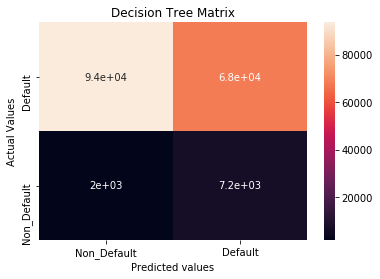

In [92]:
%matplotlib inline
import seaborn as sns
ax=plt.subplot()
sns.heatmap(Confusion_Mat_test_DT,annot=True,ax=ax);
# labels, title
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual Values');ax.set_title('Decision Tree Matrix')
ax.xaxis.set_ticklabels(['Non_Default','Default']);ax.yaxis.set_ticklabels(['Default','Non_Default']);

                                              Feature standardization
Standardization (or Z-score normalization) is the process where the features are rescaled so that they will have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

In [236]:
from sklearn.preprocessing import scale
# First filter the continuous variables
int_obj=[x for x in train_x_2.dtypes.index if train_x_2.dtypes[x]!='object']
unwanted = {'term_ 60 months','verification_status_Verified','initial_list_status_w','inq_last_6mths_3_8','grade_B','grade_D','grade_E','grade_F'}
int_list = [i for i in int_obj if i not in unwanted]
int_list

['int_rate',
 'annual_inc',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_income_ratio']

In [237]:
# copy the train and test x data frame
X_train=train_x_2.copy()
index_val=X_train.index
X_test=test_x_2.copy()
index_value=X_test.index

In [238]:
# Apply feature standardization using scale method
X_train_scale=scale(X_train[int_list])
X_train_Scale_df=pd.DataFrame(data=X_train_scale,columns=int_list,index=index_val)

X_test_Scale=scale(X_test[int_list])
X_test_Scale_df=pd.DataFrame(data=X_test_Scale,columns=int_list,index=index_value)

In [239]:
# filter without integer
X_train_2=train_x_2.copy()
X_train_2.drop(int_list,axis=1,inplace=True)
X_test_2=test_x_2.copy()
X_test_2.drop(int_list,axis=1,inplace=True)

In [240]:
# concat both the scaled dataframe and non-continuous feature df
X_trainset=pd.concat([X_train_2,X_train_Scale_df],axis=1)
X_testset=pd.concat([X_test_2,X_test_Scale_df],axis=1)

In [241]:
# concat train x and train y
train_SVM=pd.concat([X_trainset,train_y],axis=1)

In [242]:
# sampling only 10% data for training
train_10=train_SVM.sample(frac=0.1,random_state=123)
# split it into train and test
Train_x_SVM=train_10.drop(['default_ind'],axis=1).copy()
Train_y_SVM=train_10['default_ind']
Train_y_SVM.value_counts()

0    64832
1     3630
Name: default_ind, dtype: int64

                                            4.Support Vector Machine Algorithm

In [243]:
from sklearn.svm import SVC

                                     Choosing the optimal parameter using Grid Search

In [249]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'C':[0.001,0.1,100]}]
scorer={'recall_score': make_scorer(recall_score)}

SVM_clf=SVC(class_weight='balanced',kernel='linear')
SVM_GS=GridSearchCV(SVM_clf,param_grid=param_grid, scoring=scorer,refit='recall_score',cv=3)
model_GS=SVM_GS.fit(Train_x_SVM,Train_y_SVM)
model_GS.best_score_
model_GS.best_params_

                                     Build the model with the optimal parameter

In [245]:
SVM_inst=SVC(kernel='linear',class_weight='balanced',C=0.1)
SVM_1=SVM_inst.fit(Train_x_SVM,Train_y_SVM)

In [246]:
# predict the test set
test_p=SVM_1.predict(X_testset)
metrics.recall_score(test_y,test_p) 

0.7342347214710654

In [247]:
Con_Mat_test = confusion_matrix(test_y,test_p)
Con_Mat_test

array([[98652, 63259],
       [ 2457,  6788]], dtype=int64)

In [248]:
# predict the train set
train_p=SVM_1.predict(Train_x_SVM)
metrics.recall_score(Train_y_SVM,train_p) 

0.7261707988980717

                                    5.Adaptive Boosting with Decision Tree as base estimator

In [75]:
from sklearn.ensemble import AdaBoostClassifier
estimator=DecisionTreeClassifier(max_depth=3,random_state=100,class_weight='balanced')
AB= AdaBoostClassifier(base_estimator=estimator,learning_rate=1,random_state=100)

                                    Choosing the Optimal Parameter using Grid Search

In [ ]:
paramgrid={'n_estimators':[50,75,100],'learning_rate':[0.25,0.5,0.75]}
scorer={'recall_score': make_scorer(recall_score)}
AdaGS=GridSearchCV(AB,param_grid=paramgrid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
AdaBo_Model=AdaGS.fit(train_x_2,train_y)
AdaBo_Model.best_params_
AdaBo_Model.best_score_

                                     Build the model with the optimal parameter

In [76]:
AB_1= AdaBoostClassifier(base_estimator=estimator,n_estimators=75,learning_rate=0.75,random_state=100)
m1=AB_1.fit(train_x_2,train_y)
m1.estimator_weights_
m1.feature_importances_

array([0.45168338, 0.08258449, 0.14374419, 0.09424994, 0.10456794,
       0.01565447, 0.03129823, 0.0135861 , 0.00658979, 0.01408076,
       0.01030189, 0.01064626, 0.02101255])

In [77]:
# predict on train set
train_P=m1.predict(train_x_2)
metrics.recall_score(train_y,train_P) 

0.7907389480477574

In [78]:
# predict on test set
pred_test_boost=m1.predict(test_x_2)
metrics.recall_score(test_y,pred_test_boost)

0.7838831800973499

In [95]:
# Precision
metrics.precision_score(test_y,pred_test_boost)

0.12416049890350878

In [79]:
Confus_test_boost = confusion_matrix(test_y,pred_test_boost)
Confus_test_boost

array([[110790,  51121],
       [  1998,   7247]], dtype=int64)

In [80]:
# Accuracy
metrics.accuracy_score(test_y,pred_test_boost)

0.6896457033349692

In [85]:
# classification report# View the performance of the Ada Boost model
report=classification_report(test_y,pred_test_boost)
report

'             precision    recall  f1-score   support\n\n          0       0.98      0.68      0.81    161911\n          1       0.12      0.78      0.21      9245\n\navg / total       0.94      0.69      0.77    171156\n'

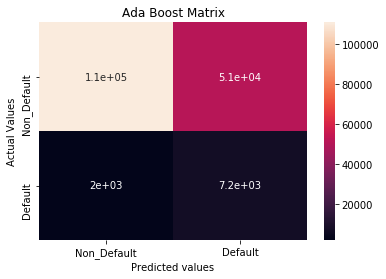

In [106]:
%matplotlib inline
import seaborn as sns
ax=plt.subplot()
sns.heatmap(Confus_test_boost,annot=True,ax=ax);
# labels, title
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual Values');ax.set_title('Ada Boost Matrix')
ax.xaxis.set_ticklabels(['Non_Default','Default']);ax.yaxis.set_ticklabels(['Non_Default','Default']);

Confusion Matrix for Decision Tree

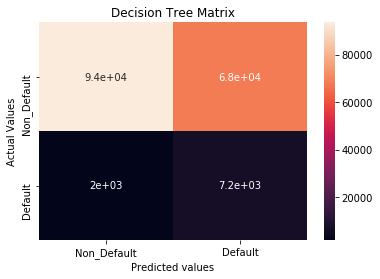

In [104]:
%matplotlib inline
import seaborn as sns
ax=plt.subplot()
sns.heatmap(Confusion_Mat_test_DT,annot=True,ax=ax);
# labels, title
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual Values');ax.set_title('Decision Tree Matrix')
ax.xaxis.set_ticklabels(['Non_Default','Default']);ax.yaxis.set_ticklabels(['Non_Default','Default']);

When comparing ada boost with decison tree model, false positive is less and better than decision tree model. So Ada Boost model is considered as the final model

                                        Test the Generalization of Ada Boosting Model

                                       Cross Validation on Adaptive Boosting Model

In [96]:
from sklearn.cross_validation import cross_val_score

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [100]:
scorer={'recall_score': make_scorer(recall_score)}
cross_val=cross_val_score(m1,train_x_2,train_y,cv=3,scoring='recall',n_jobs=-1)

In [102]:
cross_val

array([0.77549209, 0.76952243, 0.76508551])

                                       View the performance of the Ada Boost model

In [107]:
from sklearn.metrics import roc_auc_score

In [109]:
# calculate probabilities for the test data
test_pred_prob=m1.predict_proba(test_x_2)
# take the second column,because the classifier outputs scores for the 0 class as well
Pred_Y_Prob = test_pred_prob[:,1]
Pred_Y_Prob

array([0.49674102, 0.50068677, 0.49775589, ..., 0.50130929, 0.49693163,
       0.49488321])

In [110]:
# For auc value
ada_roc_auc=roc_auc_score(test_y,Pred_Y_Prob)
ada_roc_auc

0.8068277152670181

In [111]:
# For ROC curve
fpr,tpr,thresholds=roc_curve(test_y,Pred_Y_Prob)

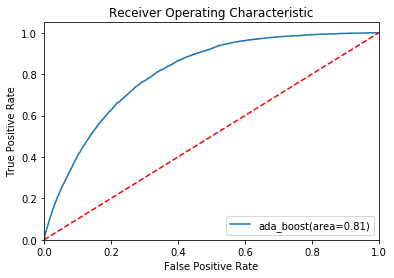

In [112]:
# ROC Curve plot
%matplotlib inline
plt.figure()
plt.plot(fpr,tpr,label='ada_boost(area=%0.2f)'% ada_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ada_roc')
plt.show()

In [113]:
# Optimal Cut-off point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4997228550074023

In [114]:
# predict using the optimal cut-off point
optimal_val=pd.DataFrame({'default':Pred_Y_Prob})
optimal_val['default_class']=optimal_val['default']
optimal_val.default_class=np.where(optimal_val.default_class >0.49,1,0)
# Recall
metrics.recall_score(test_y,optimal_val['default_class']) 

0.9874526771227691

In [115]:
metrics.accuracy_score(test_y,optimal_val['default_class'])

0.2683283086774638

Confus_Matrix = confusion_matrix(test_y,optimal_val['default_class'])
Confus_Matrix

ROC curve and thresholds mis-leads, when the dataset is highly skewed. So, it is not considered for the analysis.

                                       Saving the final AdaBoost_Tree Model using pickle

pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

In [117]:
import pickle
filename='finalized_AdaBoost_Tree_model.sav'
pickle.dump(m1,open(filename,'wb'))

In [118]:
# load the model
loaded_model_ADB_DT_1=pickle.load(open('finalized_AdaBoost_Tree_model.sav','rb'))
result=loaded_model_ADB_DT_1.predict(test_x_2) 

                                                  Conclusion

Among 171156 test data, 7247 defaulters are correctly identified by the Adaptive Boost Model. One bad loan can take almost all of the profit received from the good loans. So, this model will correctly predict the non-defaulter's even though the dataset is higly skewed.

                                                  Suggestion

Not all default cases are the same, and some late payments could still be recovered later on, so instead of a binary classification, multinomial predictions could be employed to take into account the different types of default so as to make a more granular prediction. 